              User  CPU (%)  Memory (%)
0             root    171.3    0.051737
1              rpc      0.0    0.000305
2          polkitd      0.0    0.000769
3            avahi      0.0    0.000327
4            rtkit      0.0    0.000272
5             dbus      0.0    0.000605
6   libstoragemgmt      0.0    0.000154
7             rngd      0.0    0.000258
8              pcp      0.0    0.022630
9         tongyang     18.7    0.520069
10             gdm      0.0    0.007333
11         dnsmasq      0.0    0.000103
12          colord      0.0    0.000346
13    liuxiaochuan      0.0    0.012572
14       hetongxin   1492.5    1.110152
15    yangxiaoxiao      0.0    3.372639
16      wangyuting   1094.8    0.256155
17         weiyihu      2.6    1.797396
18        yangyang    896.4    0.081331
19        wuguojia   4806.8    0.155562
20      wangwenhui    496.0    1.819421
21       liweizhuo      0.0    0.000966
22        renshida      0.0    0.002426
23     zhangyuting      0.0    0.003796


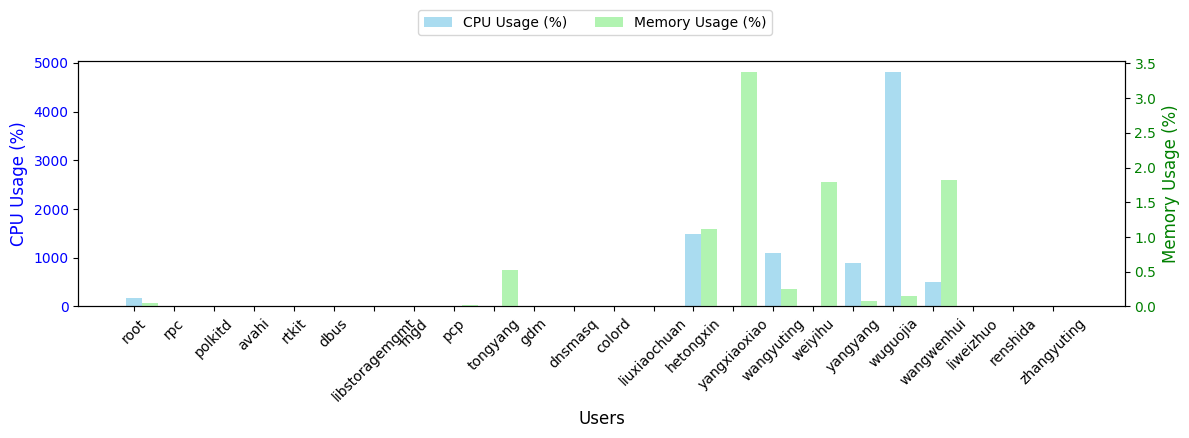

In [1]:
import psutil
import pandas as pd
import time

def get_user_resource_usage():
    # 初始化所有进程的 CPU 使用统计
    for proc in psutil.process_iter(['cpu_percent']):
        try:
            proc.cpu_percent()
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            continue

    # 等待一小段时间以刷新 CPU 使用率
    time.sleep(0.1)

    # 创建一个空的字典，用于存储用户的 CPU 和内存使用统计
    user_stats = {}

    # 遍历所有进程
    for proc in psutil.process_iter(['username', 'cpu_percent', 'memory_percent']):
        try:
            # 获取进程信息
            user = proc.info['username']
            cpu = proc.info['cpu_percent']
            memory = proc.info['memory_percent']

            # 如果用户名存在，统计资源使用
            if user:
                if user not in user_stats:
                    user_stats[user] = {'cpu': 0, 'memory': 0}
                user_stats[user]['cpu'] += cpu
                user_stats[user]['memory'] += memory
        except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
            continue

    # 转换为 DataFrame 方便后续操作
    df = pd.DataFrame.from_dict(user_stats, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'User', 'cpu': 'CPU (%)', 'memory': 'Memory (%)'}, inplace=True)

    return df

def display_usage_chart(df):
    import matplotlib.pyplot as plt
    import numpy as np

    # 设置图表大小
    fig, ax1 = plt.subplots(figsize=(12, 4))

    index = np.arange(len(df))
    bar_width = 0.4

    # 绘制 CPU 使用条形图
    ax1.bar(index, df['CPU (%)'], bar_width, label='CPU Usage (%)', color='skyblue', alpha=0.7)
    ax1.set_xlabel('Users', fontsize=12)
    ax1.set_ylabel('CPU Usage (%)', fontsize=12, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(index)
    ax1.set_xticklabels(df['User'], rotation=45, fontsize=10)

    # 创建一个共享 X 轴的第二个 Y 轴
    ax2 = ax1.twinx()
    ax2.bar(index + bar_width, df['Memory (%)'], bar_width, label='Memory Usage (%)', color='lightgreen', alpha=0.7)
    ax2.set_ylabel('Memory Usage (%)', fontsize=12, color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # 添加图例
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, fontsize=10)

    # 调整布局
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # 获取资源使用情况
    usage_df = get_user_resource_usage()

    # 打印表格
    print(usage_df)

    # 展示图表
    display_usage_chart(usage_df)
